### Part 1: Exploratory Data Analysis (EDA)
1. Read the File and Get Basic Information

In [1]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# Adjust pandas display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to fit the display
pd.set_option('display.max_rows', None)  # Show all rows if needed

In [2]:
# Read the data from a CSV file
df = pd.read_csv('music_dataset.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)

# Get basic information
print("Detailed Information of Dataframe:\n")
print(df.info())
print("-"*50)
print(f"Statistics Of Dataset:\n{df.describe()}")


Detailed Information of Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   lyrics                    28372 non-null  object 
 5   len                       28372 non-null  int64  
 6   dating                    28372 non-null  float64
 7   violence                  28372 non-null  float64
 8   world/life                28372 non-null  float64
 9   night/time                28372 non-null  float64
 10  shake the audience        28372 non-null  float64
 11  family/gospel             28372 non-null  float64
 12  romantic                  28372 non-null  float64
 13  communication            

In [3]:
# Checking Null/Duplicate Values in Dataframe
print(f"Null Values:\n{df.isna().sum()}")
print("-"*25)
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values:
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64
-------------------------
Duplicate Values: 0


2. Analyze the Genre Distribution; Plot a Bar Graph Showing the Count of Each Genre

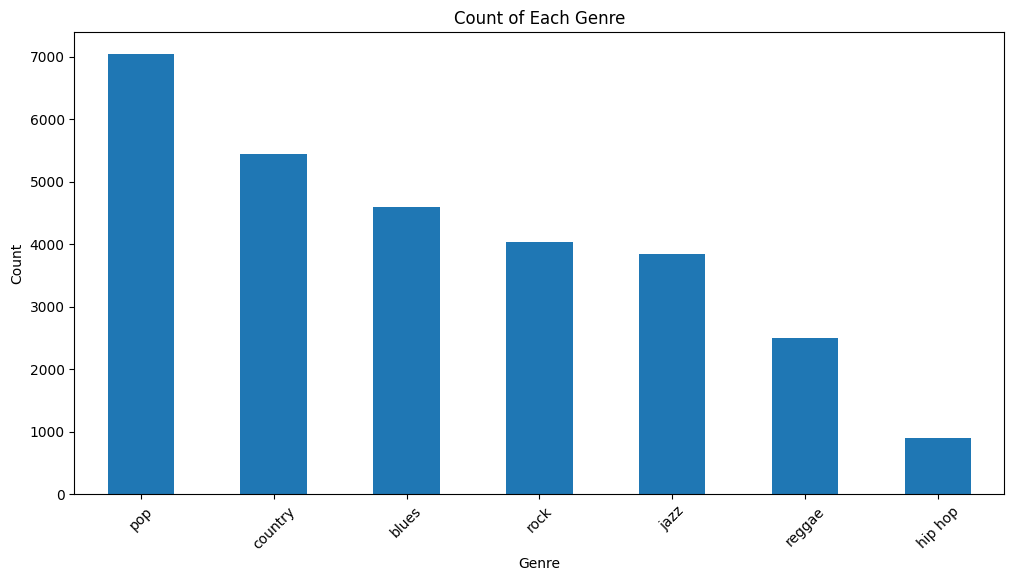

In [4]:
# Count the number of occurrences for each genre
genre_counts = df['genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


3. Examine the Lyrics Column;
Perform Basic Text Analysis

Word Count: 2065875
Unique Words: 51667


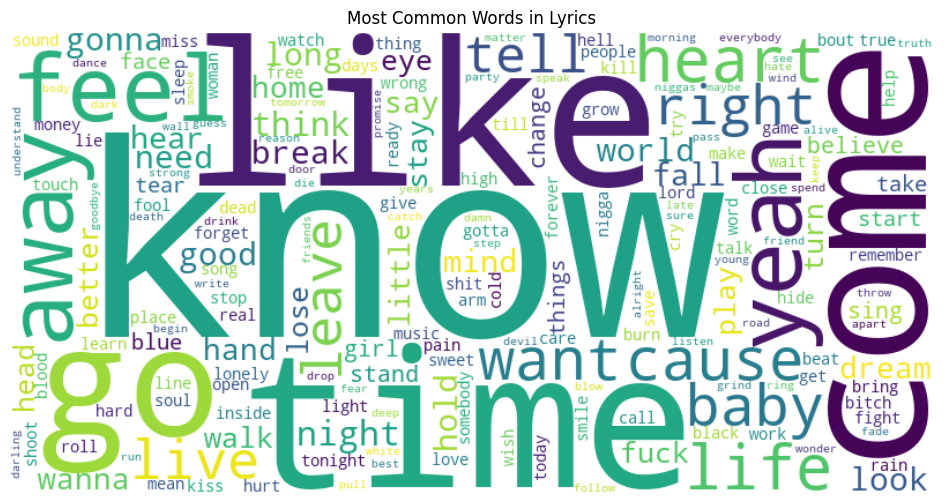

In [5]:
# Tokenize words and remove stop words
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = text.split()
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return tokens

# Combine all lyrics into a single text
all_lyrics = ' '.join(df['lyrics'].dropna())
tokens = preprocess_text(all_lyrics)

# Word count
word_count = len(tokens)
unique_words = len(set(tokens))

print(f"Word Count: {word_count}")
print(f"Unique Words: {unique_words}")

# Create a frequency distribution of the tokens
word_freq = nltk.FreqDist(tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Most Common Words in Lyrics')
plt.show()


4. Describe the Numerical Columns; a. Provide Summary Statistics

In [6]:
# List of numerical columns
numerical_cols = ['sadness', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

# Summary statistics
df[numerical_cols].describe()


,sadness,danceability,loudness,acousticness,instrumentalness,valence,energy
count,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000
mean,0.129389,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875
std,0.181143,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385
min,0.000284,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000
25%,0.001144,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361
50%,0.005263,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567
75%,0.235113,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766
max,0.981424,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000


b. Plot the Distributions of These Columns

Distributions of numeric variables in the data frame:


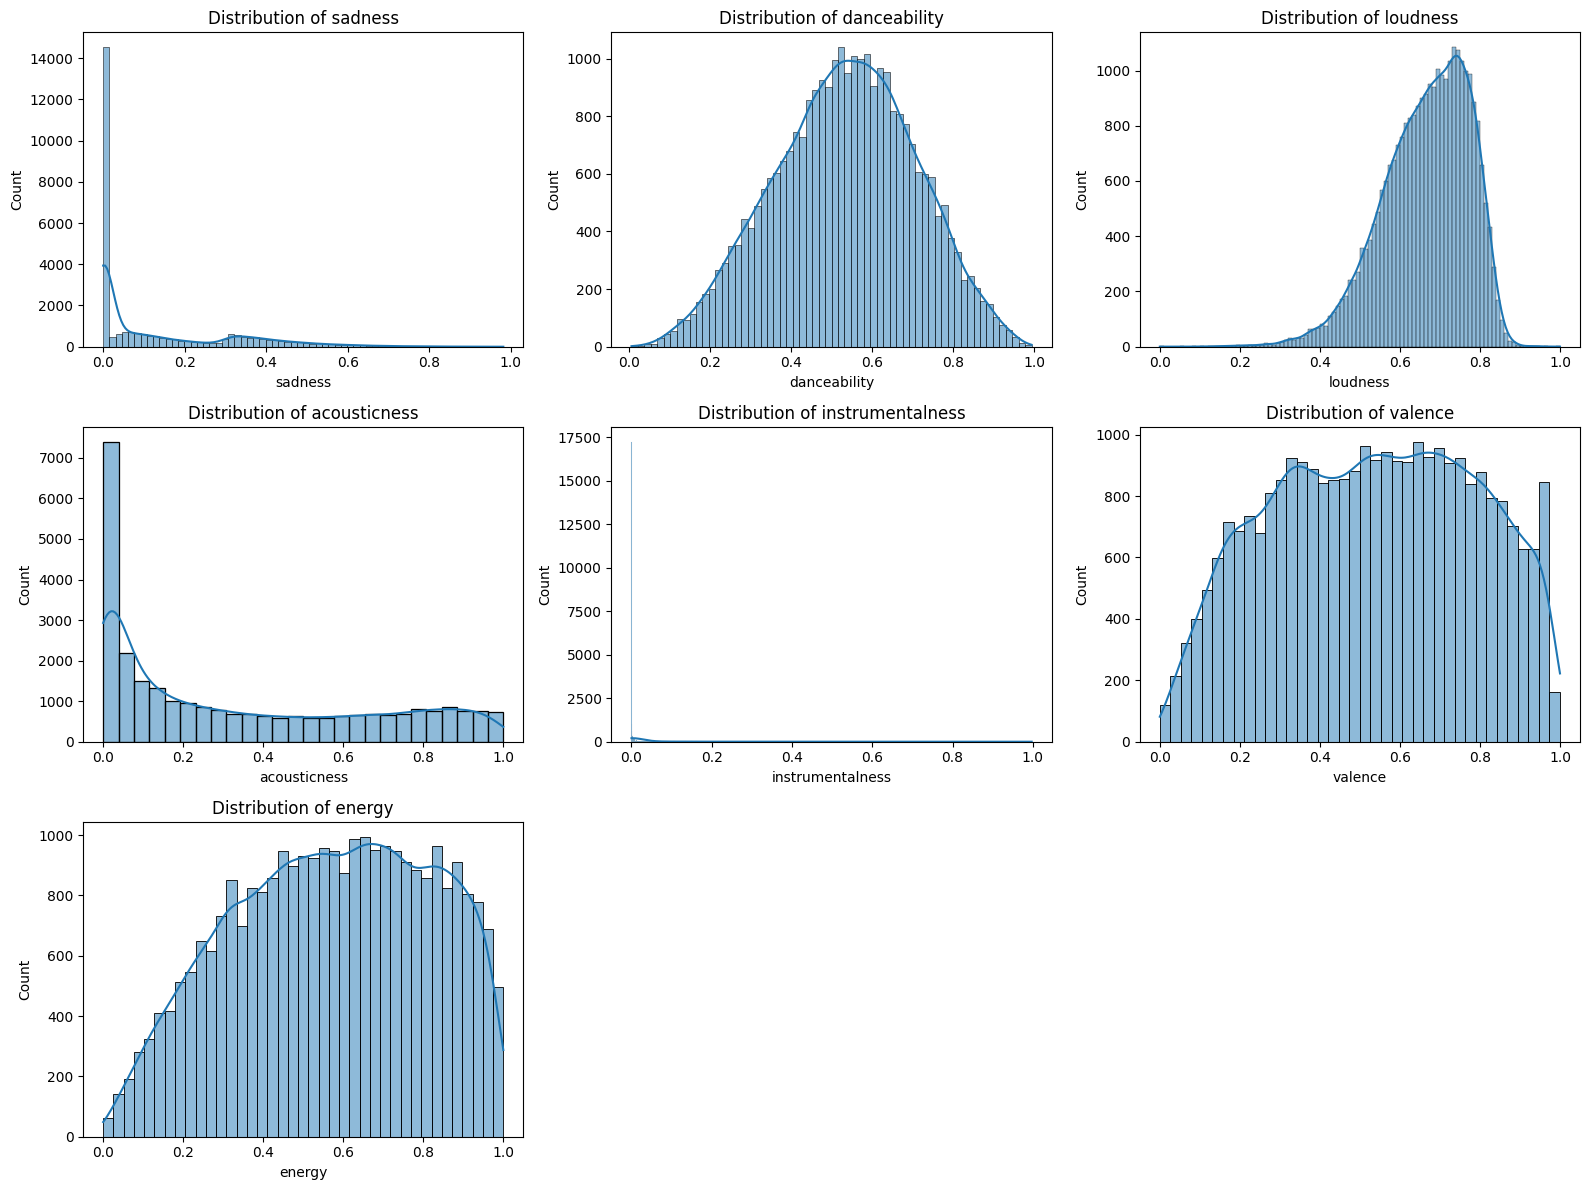

In [7]:
print("Distributions of numeric variables in the data frame:")
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


5. Perform Correlation Analysis; a. Identify Correlations Between Numerical Features

In [8]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()
corr_matrix


,sadness,danceability,loudness,acousticness,instrumentalness,valence,energy
sadness,1.000000,-0.091571,-0.058028,0.092413,-0.046661,-0.087502,-0.110450
danceability,-0.091571,1.000000,0.041380,-0.123475,-0.083308,0.493627,0.016277
loudness,-0.058028,0.041380,1.000000,-0.539738,-0.132534,0.133451,0.773135
acousticness,0.092413,-0.123475,-0.539738,1.000000,0.007762,-0.172910,-0.720045
instrumentalness,-0.046661,-0.083308,-0.132534,0.007762,1.000000,-0.077332,0.005606
valence,-0.087502,0.493627,0.133451,-0.172910,-0.077332,1.000000,0.280487
energy,-0.110450,0.016277,0.773135,-0.720045,0.005606,0.280487,1.000000


b. Plot a Heatmap to Visualize Correlations

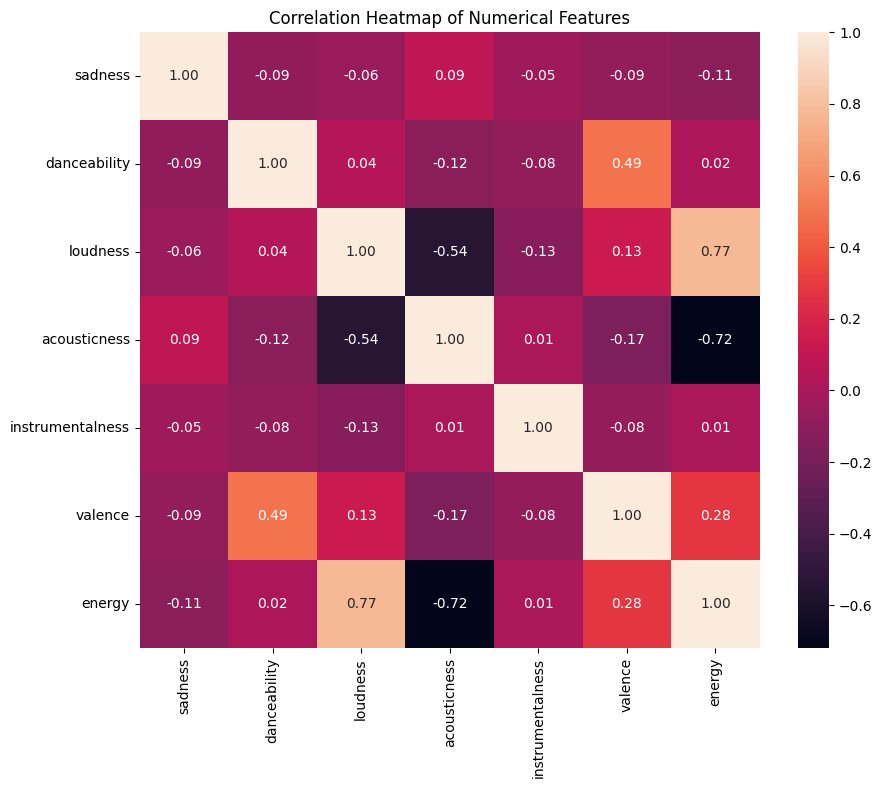

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [10]:
# dropping variable with high correlation
df = df.drop("loudness", axis = 1)

6. Perform EDA on Other Remaining Columns; a. Analyze Categorical Columns (e.g., 'artist_name', 'track_name')

Unique values in artist_name: 5426
Unique values in track_name: 23689
artist_name
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
elvis presley       97
dolly parton        96
waylon jennings     95
george strait       92
nina simone         82
Name: count, dtype: int64


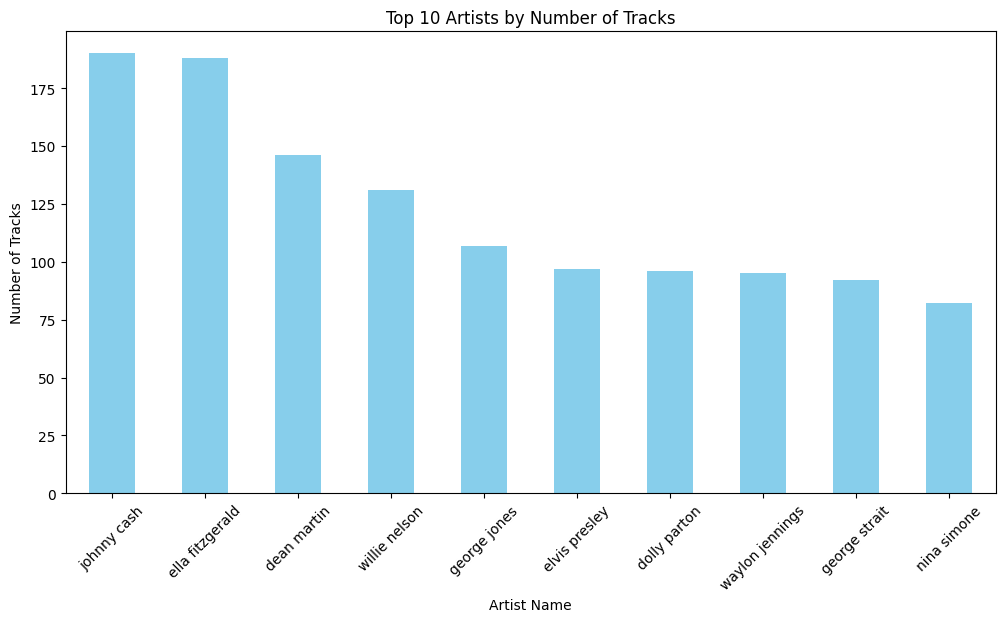

In [11]:
# Analyze unique values
print("Unique values in artist_name:", df['artist_name'].nunique())
print("Unique values in track_name:", df['track_name'].nunique())

# Example: Top 10 artists by number of tracks
top_artists = df['artist_name'].value_counts().head(10)
print(top_artists)
top_artists.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


b. Analyze Date-related Columns

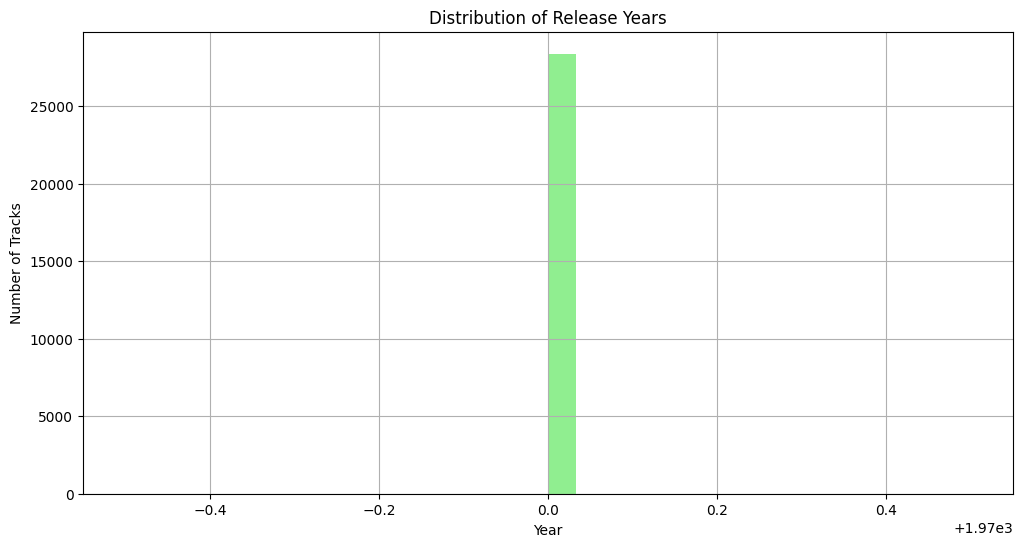

In [12]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year and month from release_date
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Plot the distribution of release years
plt.figure(figsize=(12, 6))
df['release_year'].dropna().astype(int).hist(bins=30, color='lightgreen')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()


c. Analyze Additional Columns; For other columns such as dating, violence, world/life, etc., you can perform similar analysis depending on their data types and relevance.

In [13]:
binary_columns = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings']

# Calculate the percentage of tracks with these features
for col in binary_columns:
    if df[col].dtype == 'bool':
        percentage = df[col].mean() * 100
        print(f"{col}: {percentage:.2f}% tracks contain this feature")
    else:
        print(f"{col} is not binary or boolean.")


dating is not binary or boolean.
violence is not binary or boolean.
world/life is not binary or boolean.
night/time is not binary or boolean.
shake the audience is not binary or boolean.
family/gospel is not binary or boolean.
romantic is not binary or boolean.
communication is not binary or boolean.
obscene is not binary or boolean.
music is not binary or boolean.
movement/places is not binary or boolean.
light/visual perceptions is not binary or boolean.
family/spiritual is not binary or boolean.
like/girls is not binary or boolean.
sadness is not binary or boolean.
feelings is not binary or boolean.


Predictive Model 1: Genre Prediction; 1. Convert the Genre Variable to a Convenient Form for Modeling
Convert the categorical genre variable into a format suitable for modeling, such as one-hot encoding or label encoding.

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sp
import xgboost as xgb


In [15]:
df.genre.value_counts()

genre
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: count, dtype: int64

In [16]:
# Convert genre to numeric labels
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

In [17]:
df.drop(columns=['genre', 'topic'], inplace=True)

2. Preprocess the Lyrics Column Using Natural Language Processing Techniques; Tokenization and Vectorization:Use techniques such as TF-IDF or word embeddings (e.g., Word2Vec, BERT) to convert text into numerical features.

In [53]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit the number of features
X_lyrics = tfidf_vectorizer.fit_transform(df['lyrics'].fillna(''))

# Convert sparse matrix to DataFrame
X_lyrics_df = pd.DataFrame(X_lyrics.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


3. Prepare the Feature Set; Combine the numerical features with the processed text features.

In [58]:
# Numerical features
numerical_features = df[['sadness', 'danceability', 'acousticness', 'instrumentalness', 'valence', 'energy']] # 'loudness',
numerical_features = numerical_features.fillna(0)  # Handle missing values

# Standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Combine text features with numerical features
X_combined = sp.hstack([sp.csr_matrix(numerical_features_scaled), sp.csr_matrix(X_lyrics_df)])


4. Split the Data into Training and Testing Sets

In [59]:
# Define target variable and features
y = df['genre_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)


5. Build and Evaluate a Predictive Model; a. Logistic Regression and Random Forest:

In [65]:
# Logistic Regression
log_reg = LogisticRegression(C=1.0, penalty='l1',solver='saga',tol=0.0001, max_iter=100)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest
rf = RandomForestClassifier(criterion='entropy', n_estimators=150, max_depth=40, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


c:\Users\USER\anaconda3\envs\pytorch\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.443843984962406
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.25      0.29      1368
           1       0.49      0.58      0.53      1662
           2       0.62      0.49      0.55       277
           3       0.47      0.40      0.43      1120
           4       0.38      0.49      0.43      2102
           5       0.53      0.54      0.54       771
           6       0.48      0.36      0.41      1212

    accuracy                           0.44      8512
   macro avg       0.48      0.44      0.45      8512
weighted avg       0.45      0.44      0.44      8512

Random Forest Accuracy: 0.43397556390977443
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.28      0.32      1368
           1       0.45      0.59      0.51      1662
           2       0.81      0.57      0.67       277
           3       0.47      0.37      0.41   

In [71]:
modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train, y_train)

y_pred_rf = modelXGB.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.46264097744360905
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.33      0.36      1368
           1       0.50      0.58      0.54      1662
           2       0.79      0.56      0.65       277
           3       0.49      0.44      0.46      1120
           4       0.40      0.48      0.44      2102
           5       0.57      0.54      0.55       771
           6       0.46      0.37      0.41      1212

    accuracy                           0.46      8512
   macro avg       0.51      0.47      0.49      8512
weighted avg       0.47      0.46      0.46      8512



b. Feature Selection: For Random Forest, you can inspect feature importances.

In [73]:
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = list(X_lyrics_df.columns) + list(['sadness', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy'])

# Print top 10 features
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")


aaah: 0.0423
abandon: 0.0309
ablaze: 0.0277
abide: 0.0272
madness: 0.0271
companion: 0.0234
ability: 0.0221
aaaah: 0.0127
nightmares: 0.0100
limbs: 0.0085


c. Metrics:

Accuracy, precision, recall, and F1-score are useful metrics to evaluate model performance. The classification_report provides a comprehensive summary.

Predictive Model 2: Song Recommendation
1. Define Criteria for Song Recommendation
Example Criteria:

Mood: sadness, danceability, etc.
Filters: Specific values or ranges for features like danceability, loudness.
2. Split the Data into Training and Testing Sets
If using a content-based recommendation, this might involve splitting based on user preferences or ratings, but for simplicity, we will assume a basic recommendation approach.

3. Build and Evaluate a Recommendation System
Content-Based Filtering Example:

In [74]:
def recommend_songs(user_preferences, df, top_n=10):
    # User preferences should be in the same feature space as the dataset
    user_vector = pd.DataFrame([user_preferences], columns=numerical_features.columns)
    user_vector_scaled = scaler.transform(user_vector)
    
    # Compute cosine similarity
    similarities = cosine_similarity(user_vector_scaled, numerical_features_scaled)
    df['similarity'] = similarities.flatten()
    
    # Recommend top N songs
    recommendations = df[['track_name', 'artist_name', 'similarity']].sort_values(by='similarity', ascending=False).head(top_n)
    return recommendations

# Example user preferences
user_preferences = {
    'sadness': 0.2,
    'danceability': 0.7,
    'loudness': -5,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'valence': 0.5,
    'energy': 0.6
}

# Get recommendations
recommendations = recommend_songs(user_preferences, df)
print(recommendations)


                                   track_name        artist_name  similarity
22972                          same old story          passafire    0.975284
21155                         there is no end    the abyssinians    0.974117
3846                                who is it    michael jackson    0.965535
27784  the real revenge (i alithini ekdikisi)      terror x crew    0.963954
10811                           all that i am     mindy mccready    0.963760
22764                     bloodshed in africa       alpha blondy    0.960841
3971                                     weak                swv    0.959276
7012               candy (feat. trippie redd)  machine gun kelly    0.952905
22552                               open mind       stone senses    0.951621
22368                        fourth dimension        groundation    0.950530


Extra In-dept Analysis & EDA on 'lyrics' column to check the Subjectivity, Polarity & Analysis

In [86]:
df_lyrics = pd.DataFrame(df['lyrics'])

In [87]:
df_lyrics

,lyrics
0,hold time feel break feel untrue convince spea...
1,believe drop rain fall grow believe darkest ni...
2,sweetheart send letter goodbye secret feel bet...
3,kiss lips want stroll charm mambo chacha merin...
4,till darling till matter know till dream live ...
...,...
28367,cause fuck leave scar tick tock clock come kno...
28368,minks things chain ring braclets yap fame come...
28369,get ban get ban stick crack relax plan attack ...
28370,check check yeah yeah hear thing call switch g...


In [88]:
# create function to clean and remove unwanted text or symbol like @,# and links.
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
 
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df_lyrics['clean_lyrics']=df_lyrics['lyrics'].apply(cleanTxt)   ## applying function
## clean Text
df_lyrics.head(2)

,lyrics,clean_lyrics
0,hold time feel break feel untrue convince spea...,hold time feel break feel untrue convince spea...
1,believe drop rain fall grow believe darkest ni...,believe drop rain fall grow believe darkest ni...


In [89]:
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df_lyrics['Subjectivity']=df_lyrics['clean_lyrics'].apply(getSubjectivity)
df_lyrics['Polarity']=df_lyrics['clean_lyrics'].apply(getPolarity)
## show new Dataframe
df_lyrics.head(5)


,lyrics,clean_lyrics,Subjectivity,Polarity
0,hold time feel break feel untrue convince spea...,hold time feel break feel untrue convince spea...,0.50625,-0.096875
1,believe drop rain fall grow believe darkest ni...,believe drop rain fall grow believe darkest ni...,0.77500,0.450000
2,sweetheart send letter goodbye secret feel bet...,sweetheart send letter goodbye secret feel bet...,0.52000,-0.110000
3,kiss lips want stroll charm mambo chacha merin...,kiss lips want stroll charm mambo chacha merin...,0.52500,0.150000
4,till darling till matter know till dream live ...,till darling till matter know till dream live ...,0.32500,0.134091


In [90]:
# Based on polarity we can get positive, negative and neutral lyrics.

## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df_lyrics['Analysis'] = df_lyrics['Polarity'].apply(getAnalysis)
df_lyrics.head(10)

,lyrics,clean_lyrics,Subjectivity,Polarity,Analysis
0,hold time feel break feel untrue convince spea...,hold time feel break feel untrue convince spea...,0.506250,-0.096875,Negative
1,believe drop rain fall grow believe darkest ni...,believe drop rain fall grow believe darkest ni...,0.775000,0.450000,Positive
2,sweetheart send letter goodbye secret feel bet...,sweetheart send letter goodbye secret feel bet...,0.520000,-0.110000,Negative
3,kiss lips want stroll charm mambo chacha merin...,kiss lips want stroll charm mambo chacha merin...,0.525000,0.150000,Positive
4,till darling till matter know till dream live ...,till darling till matter know till dream live ...,0.325000,0.134091,Positive
5,convoy light dead ahead merchantmen trump dies...,convoy light dead ahead merchantmen trump dies...,0.479710,-0.071377,Negative
6,piece mindin world knowin life come bring give...,piece mindin world knowin life come bring give...,0.471195,0.035714,Positive
7,care moment hold fast press lips dream heaven ...,care moment hold fast press lips dream heaven ...,0.600000,0.200000,Positive
8,lonely night surround power read mind hour nig...,lonely night surround power read mind hour nig...,0.473810,-0.023810,Negative
9,tear heart seat stay awhile tear heart game st...,tear heart seat stay awhile tear heart game st...,0.439652,-0.192399,Negative


In [91]:
df_lyrics['Analysis'].value_counts(normalize=True)*100

Analysis
Positive    59.675032
Negative    36.599464
Neutral      3.725504
Name: proportion, dtype: float64

In [93]:
df_lyrics.groupby('Analysis').describe().iloc[:,2]*100

Analysis
Negative    15.913262
Neutral     21.606650
Positive    13.621074
Name: (Subjectivity, std), dtype: float64

In [94]:
df_lyrics.groupby('Analysis')['Subjectivity'].value_counts(normalize = True)

Analysis  Subjectivity
Negative  0.500000        0.017623
          0.400000        0.017527
          0.600000        0.010882
          0.700000        0.008571
          1.000000        0.006837
                            ...   
Positive  0.963636        0.000059
          0.987500        0.000059
          0.988235        0.000059
          0.988889        0.000059
          0.995000        0.000059
Name: proportion, Length: 15112, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_13908\1781565954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Analysis', data = df_lyrics, palette='hls')


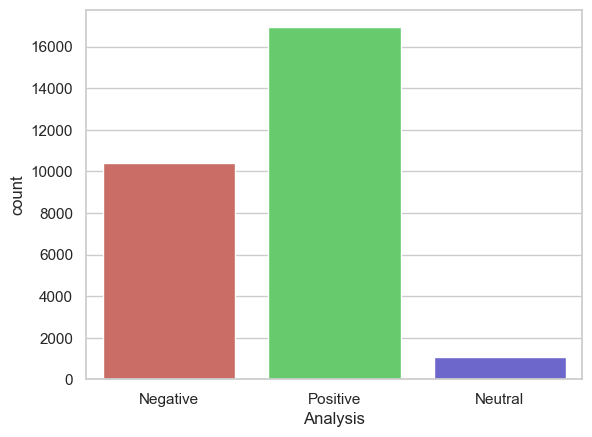

In [96]:
sns.set(style='white')
sns.set(style = 'whitegrid', color_codes = True)
sns.countplot(x = 'Analysis', data = df_lyrics, palette='hls')
plt.show()

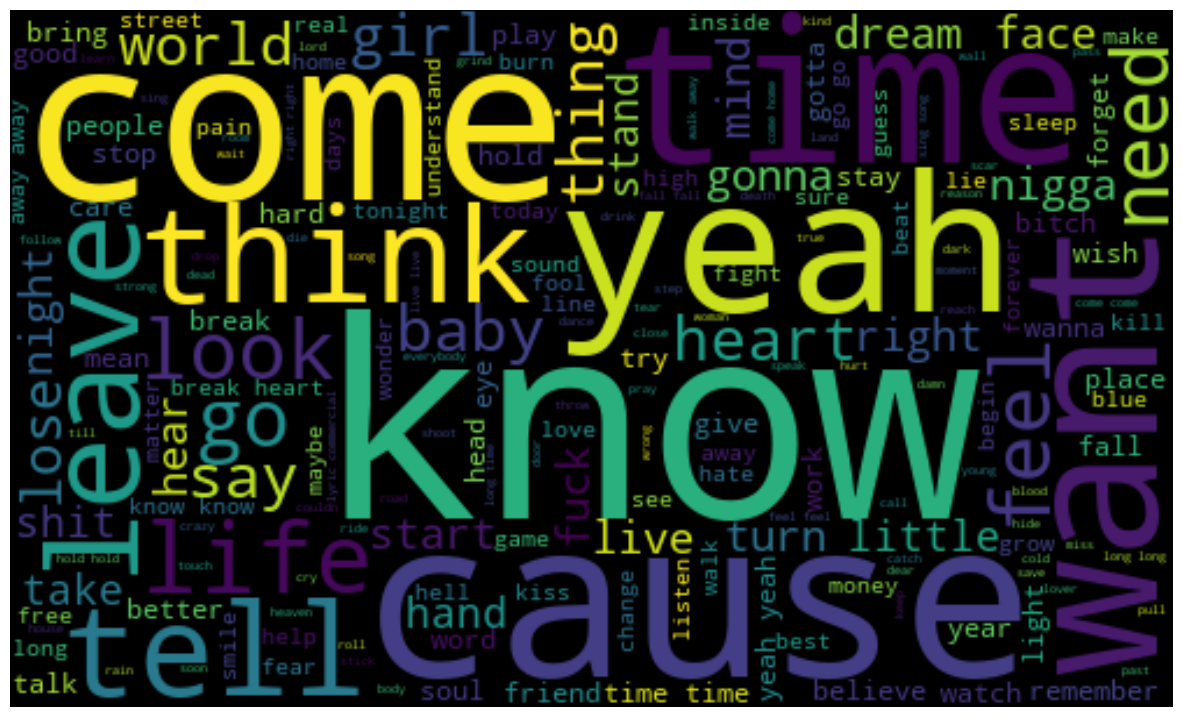

In [97]:
## plot word Cloud
plt.figure(figsize=(15,15))
allWords=' '.join([twts for twts in df_lyrics['clean_lyrics']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()